In [15]:
# !pip install wordcloud
# !pip install pandas pythainlp wordcloud matplotlib
# !pip install pythainlp
# !pip install pythai
!pip install nltk


In [9]:
import pandas as pd
from pythainlp.tokenize import word_tokenize

**import data**

In [10]:
df_review = pd.read_csv('df_review.csv')
df_review

,id_review_main,review_rating,review_text,sentiment
0,review_1,3,เด็กเสิร์ฟน้อยขนาดไปวันเสาร์นั่งกินอาหารตั้งแต...,neg
1,review_1,5,มาครั้งแรกอาหารอร่อยถูกปาก.บรรยากาศดี.กาแฟอร่อ...,pos
2,review_1,4,บรรยากาศดีค่ะ ถ้ามาช่วงค่ำมีดนตรี อาหาร น่าจ...,pos
3,review_1,5,ร้านสวยยยยมากกก บรรยากาศดี ตอนแรกไม่ได้ตั้งใจแ...,pos
4,review_1,4,Theme Cafe & Bistro คาเฟ่โรงนาสีแดงสไตล์ยุโรปต...,pos
...,...,...,...,...
5420,review_265,4,พูดจาถือว่าผ่าน บริการถือว่าโอเค แต่ติดตรงที่ก...,neu
5421,review_265,5,อาหารอร่อย ร้านสะอาด พนักงานน่ารัก กาแฟเป็น al...,pos
5422,review_265,5,มีที่นั่งให้นั่ง ชอบค่ะ เหมาะกับการนั่งทำงาน,pos
5423,review_265,5,positive,pos


**Group only Positive comment**

In [11]:
df_review.groupby('sentiment').size()

sentiment
neg     314
neu     591
pos    4520
dtype: int64

In [12]:
df_positive = df_review[df_review['sentiment'] == 'pos'].reset_index(drop=True)
df_positive


,id_review_main,review_rating,review_text,sentiment
0,review_1,5,มาครั้งแรกอาหารอร่อยถูกปาก.บรรยากาศดี.กาแฟอร่อ...,pos
1,review_1,4,บรรยากาศดีค่ะ ถ้ามาช่วงค่ำมีดนตรี อาหาร น่าจ...,pos
2,review_1,5,ร้านสวยยยยมากกก บรรยากาศดี ตอนแรกไม่ได้ตั้งใจแ...,pos
3,review_1,4,Theme Cafe & Bistro คาเฟ่โรงนาสีแดงสไตล์ยุโรปต...,pos
4,review_1,4,So good\r\nเครื่องดื่มดี\r\nอาหารอร่อย\r\nบริก...,pos
...,...,...,...,...
4515,review_265,5,สาขานี้แอร์เย็นมาก พนักงานขยันทำงาน สะอาด สะดว...,pos
4516,review_265,5,อาหารอร่อย ร้านสะอาด พนักงานน่ารัก กาแฟเป็น al...,pos
4517,review_265,5,มีที่นั่งให้นั่ง ชอบค่ะ เหมาะกับการนั่งทำงาน,pos
4518,review_265,5,positive,pos


**tokenization**

In [13]:
#tokenization
df_positive['tokens']  = df_positive['review_text'].apply(lambda x: word_tokenize(x, engine="newmm"))
df_positive

,id_review_main,review_rating,review_text,sentiment,tokens
0,review_1,5,มาครั้งแรกอาหารอร่อยถูกปาก.บรรยากาศดี.กาแฟอร่อ...,pos,"[มา, ครั้งแรก, อาหาร, อร่อย, ถูก, ปา, ก., บรรย..."
1,review_1,4,บรรยากาศดีค่ะ ถ้ามาช่วงค่ำมีดนตรี อาหาร น่าจ...,pos,"[บรรยากาศ, ดี, ค่ะ, , ถ้า, มา, ช่วง, ค่ำ, มี..."
2,review_1,5,ร้านสวยยยยมากกก บรรยากาศดี ตอนแรกไม่ได้ตั้งใจแ...,pos,"[ร้าน, สวย, ยยย, มาก, กก, , บรรยากาศ, ดี, , ..."
3,review_1,4,Theme Cafe & Bistro คาเฟ่โรงนาสีแดงสไตล์ยุโรปต...,pos,"[Theme, , Cafe, , &, , Bistro, , คาเฟ่, โร..."
4,review_1,4,So good\r\nเครื่องดื่มดี\r\nอาหารอร่อย\r\nบริก...,pos,"[So, , good, \r\n, เครื่องดื่ม, ดี, \r\n, อาห..."
...,...,...,...,...,...
4515,review_265,5,สาขานี้แอร์เย็นมาก พนักงานขยันทำงาน สะอาด สะดว...,pos,"[สาขา, นี้, แอร์, เย็น, มาก, , พนักงาน, ขยัน,..."
4516,review_265,5,อาหารอร่อย ร้านสะอาด พนักงานน่ารัก กาแฟเป็น al...,pos,"[อาหาร, อร่อย, , ร้าน, สะอาด, , พนักงาน, น่า..."
4517,review_265,5,มีที่นั่งให้นั่ง ชอบค่ะ เหมาะกับการนั่งทำงาน,pos,"[มี, ที่นั่ง, ให้, นั่ง, , ชอบ, ค่ะ, , เหมาะ..."
4518,review_265,5,positive,pos,[positive]


**remove stopwords**

In [17]:
from pythainlp.corpus.common import thai_stopwords

stopwords = set(thai_stopwords())  # ใช้ stopwords ภาษาไทยจาก PyThaiNLP

# คำที่ต้องการลบเพิ่มเติม
stopwords_to_remove = {'positive', 'ร้าน', 'กก', 'ตัว'}

# ตรวจสอบและลบ stopwords จาก list
def safe_remove_stopwords(tokens):
    if isinstance(tokens, list):
        return [
            word.strip() for word in tokens
            if isinstance(word, str)
            and word.strip().lower() not in stopwords_to_remove
            and word.strip().lower() not in stopwords
            and len(word.strip()) > 1
        ]
    return []

# ใช้กับคอลัมน์ 'tokens'
df_positive = df_positive.assign(
    clean_tokens = df_positive['tokens'].apply(safe_remove_stopwords)
).loc[
    lambda df: ~df['clean_tokens'].apply(
        lambda x: any(word in stopwords_to_remove for word in x) if isinstance(x, list) else False
    )
]

df_positive


,id_review_main,review_rating,review_text,sentiment,tokens,clean_tokens
0,review_1,5,มาครั้งแรกอาหารอร่อยถูกปาก.บรรยากาศดี.กาแฟอร่อ...,pos,"[มา, ครั้งแรก, อาหาร, อร่อย, ถูก, ปา, ก., บรรย...","[ครั้งแรก, อาหาร, อร่อย, ปา, ก., บรรยากาศ, ดี,..."
1,review_1,4,บรรยากาศดีค่ะ ถ้ามาช่วงค่ำมีดนตรี อาหาร น่าจ...,pos,"[บรรยากาศ, ดี, ค่ะ, , ถ้า, มา, ช่วง, ค่ำ, มี...","[บรรยากาศ, ดี, ค่ำ, ดนตรี, อาหาร, สวย, ค่า, อา..."
2,review_1,5,ร้านสวยยยยมากกก บรรยากาศดี ตอนแรกไม่ได้ตั้งใจแ...,pos,"[ร้าน, สวย, ยยย, มาก, กก, , บรรยากาศ, ดี, , ...","[สวย, ยยย, บรรยากาศ, ดี, ตอนแรก, ตั้งใจ, แวะ, ..."
3,review_1,4,Theme Cafe & Bistro คาเฟ่โรงนาสีแดงสไตล์ยุโรปต...,pos,"[Theme, , Cafe, , &, , Bistro, , คาเฟ่, โร...","[Theme, Cafe, Bistro, คาเฟ่, โรงนา, สีแดง, สไต..."
4,review_1,4,So good\r\nเครื่องดื่มดี\r\nอาหารอร่อย\r\nบริก...,pos,"[So, , good, \r\n, เครื่องดื่ม, ดี, \r\n, อาห...","[So, good, เครื่องดื่ม, ดี, อาหาร, อร่อย, บริก..."
...,...,...,...,...,...,...
4515,review_265,5,สาขานี้แอร์เย็นมาก พนักงานขยันทำงาน สะอาด สะดว...,pos,"[สาขา, นี้, แอร์, เย็น, มาก, , พนักงาน, ขยัน,...","[สาขา, แอร์, เย็น, พนักงาน, ขยัน, ทำงาน, สะอาด..."
4516,review_265,5,อาหารอร่อย ร้านสะอาด พนักงานน่ารัก กาแฟเป็น al...,pos,"[อาหาร, อร่อย, , ร้าน, สะอาด, , พนักงาน, น่า...","[อาหาร, อร่อย, สะอาด, พนักงาน, น่ารัก, กาแฟ, a..."
4517,review_265,5,มีที่นั่งให้นั่ง ชอบค่ะ เหมาะกับการนั่งทำงาน,pos,"[มี, ที่นั่ง, ให้, นั่ง, , ชอบ, ค่ะ, , เหมาะ...","[ที่นั่ง, นั่ง, ชอบ, เหมาะกับ, นั่ง, ทำงาน]"
4518,review_265,5,positive,pos,[positive],[]


**normalize token**

In [18]:
import re

# ฟังก์ชันสำหรับ normalize token อย่างปลอดภัย
def normalize_tokens(tokens):
    if isinstance(tokens, list):
        clean_list = []
        for token in tokens:
            if isinstance(token, str):
                token = token.lower()
                token = re.sub(r'[^\u0E00-\u0E7Fa-zA-Z]+', '', token)  # ลบสัญลักษณ์และตัวเลข
                if len(token) > 1 and token not in ['ๆ', 'ฯ', 'ฯลฯ']:
                    clean_list.append(token)
        return clean_list
    return []

df_positive['normalized_tokens'] = df_positive['clean_tokens'].apply(normalize_tokens)

**frequency of word**

In [19]:
#df wordcount all
from collections import Counter
import pandas as pd

# รวมคำทั้งหมดจากทุกแถวใน clean_tokens
all_words = [word for row in df_positive['clean_tokens'] if isinstance(row, list) for word in row]

# นับความถี่
word_counts = Counter(all_words)

# สร้าง DataFrame
df_words = pd.DataFrame(word_counts.items(), columns=['word', 'count'])

# เรียงจากมากไปน้อย
df_words = df_words.sort_values(by='count', ascending=False).reset_index(drop=True)

from IPython.display import HTML

# ตั้งค่าความสูงที่คุณต้องการ
scrollable_df = df_words.to_html(index=False)
html_code = f'<div style="height: 300px; overflow-y: scroll;">{scrollable_df}</div>'

# แสดงผล
display(HTML(html_code))

word,count
อร่อย,2107
ดี,2044
กาแฟ,1195
บรรยากาศ,999
อาหาร,891
ราคา,755
น่ารัก,705
นั่ง,629
ดีมาก,562
บริการ,556


**word cloud**

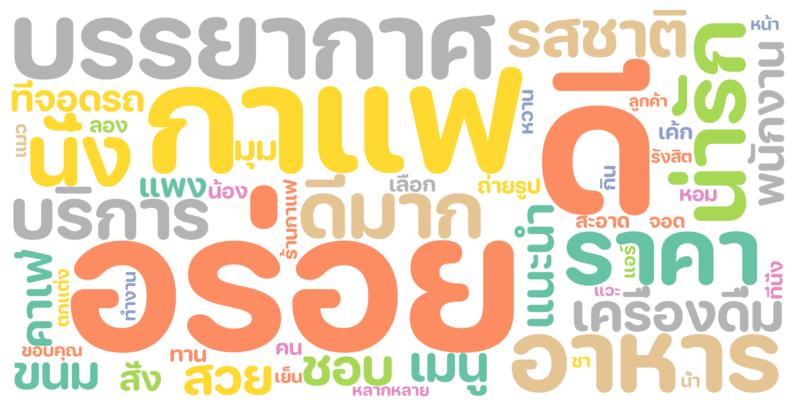

In [20]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_words = [word for tokens in df_positive['normalized_tokens'] for word in tokens]
word_freq = Counter(all_words)

wordcloud = WordCloud(
    font_path= r'fonts/fc_iconic.otf' , 
    width=2000,
    height=1000,
    background_color='white',
    colormap='Set2',
    max_words=50
).generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
